In [136]:
# 读取数据

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
data= pd.read_csv("E:\Pycharm\Intrusion_Detection\kddcup.data_10_percent.csv",  header=None,names = col_names)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [138]:
#去重
IsDuplicated=data.duplicated()
print(IsDuplicated.value_counts())

True     348435
False    145586
dtype: int64


In [139]:
data_1=data.drop_duplicates()
print(data_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145586 entries, 0 to 494020
Data columns (total 42 columns):
duration                       145586 non-null int64
protocol_type                  145586 non-null object
service                        145586 non-null object
flag                           145586 non-null object
src_bytes                      145586 non-null int64
dst_bytes                      145586 non-null int64
land                           145586 non-null int64
wrong_fragment                 145586 non-null int64
urgent                         145586 non-null int64
hot                            145586 non-null int64
num_failed_logins              145586 non-null int64
logged_in                      145586 non-null int64
num_compromised                145586 non-null int64
root_shell                     145586 non-null int64
su_attempted                   145586 non-null int64
num_root                       145586 non-null int64
num_file_creations             145586 

In [88]:
# data_1.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [140]:
#建立X,y
feature=["duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files",
    "is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]
X_1=data_1[feature] 
y=data_1['label'].copy()   #一维
y=y.as_matrix()
y

array(['normal.', 'normal.', 'normal.', ..., 'normal.', 'normal.',
       'normal.'], dtype=object)

In [141]:
##y的处理
u2r=["buffer_overflow.","loadmodule.","perl.","rootkit."]
r2l=["ftp_write.","imap.","guess_passwd.","phf.","spy.","multihop.","warezmaster.","warezclient."]
dos=["back.","land.","pod.","neptune.","smurf.","teardrop."]
probe=["satan.","portsweep.","ipsweep.","nmap."]
for i in u2r:
    y[y==i]="u2r"
for i in r2l:
    y[y==i]="r2l"
for i in dos:
    y[y==i]="dos"
for i in probe:
    y[y==i]="probe"
y[y=="normal."]="normal"

# print(y.value_counts())

In [142]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_1)
X=scaler.transform(X_1)  #X是ndarray

In [143]:
#分类器
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
##建立模型
clf_1 = RandomForestClassifier()
##模型评估
scores = cross_val_score(clf_1, X, y, cv=10)
print(scores.mean())

0.995865297265


In [156]:
#查看分类错误样本
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)  #切分样本
clf_1.fit(X_train,y_train)
preditions=clf_1.predict(X_test)

from  sklearn.metrics import accuracy_score
acc=accuracy_score(preditions,y_test) #计算accuracy
print(acc)

0.998969709458


In [144]:
##错误分类样本
misclf=y_test[preditions!=y_test]
misclf.value_counts()

normal    8
r2l       5
probe     5
u2r       4
dos       3
Name: label, dtype: int64

In [147]:
#正确类别总数
y_test.value_counts()

normal    17583
dos       10888
probe       423
r2l         216
u2r           8
Name: label, dtype: int64

In [50]:
#计算错误率
print("normal misclassify rate:%.4f" % (8/17583))
print("dos misclassify rate:%.4f" % (3/10888))
print("probe misclassify rate:%.4f" % (5/423))
print("r2l misclassify rate:%.4f" % (5/216))
print("u2r misclassify rate:%.4f" % (4/8))

normal misclassify rate:0.0005
dos misclassify rate:0.0003
probe misclassify rate:0.0118
r2l misclassify rate:0.0231
u2r misclassify rate:0.5000


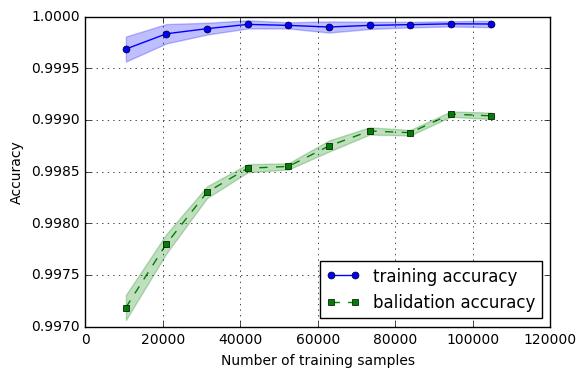

In [148]:
#学习曲线
import numpy as np
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(estimator=clf_1,
                                X=X_train,y=y_train,
                                train_sizes=np.linspace(0.1,1,10),
                                 cv=10, n_jobs=1,random_state=0)
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_std=np.std(train_scores,axis=1)
import matplotlib.pyplot as plt
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,
         label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,
         color='blue',alpha=0.25)
plt.plot(train_sizes,test_mean,color='green',linestyle='--',
         marker='s',markersize=5,
         label='balidation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,
         color='green',alpha=0.25)
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [154]:
test_mean[-1]

0.99903837527512918

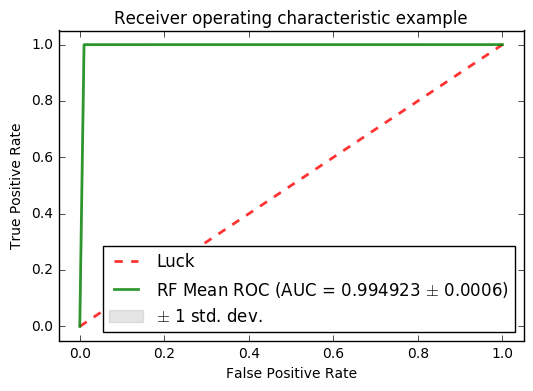

In [135]:
#ROC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
##建立模型
clf_1 = RandomForestClassifier()

cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv.split(X, y)):

    probas_ = clf_1.fit(X[train], y[train]).predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1], pos_label="normal")
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # plt.plot(fpr, tpr, lw=1, alpha=0.3,
    #          label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='g',
         label=r'RF Mean ROC (AUC = %0.6f $\pm$ %0.4f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

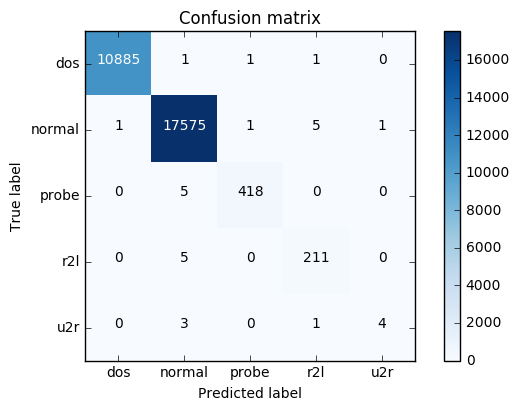

In [149]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#混淆矩阵
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,preditions)
class_names=['dos','normal','probe','r2l','u2r']
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

In [153]:
#分类报告
from sklearn.metrics import classification_report
class_names=['dos','normal','probe','r2l','u2r']
print(classification_report(y_test,preditions,target_names=class_names,digits=4))

             precision    recall  f1-score   support

        dos     0.9999    0.9997    0.9998     10888
     normal     0.9992    0.9995    0.9994     17583
      probe     0.9952    0.9882    0.9917       423
        r2l     0.9679    0.9769    0.9724       216
        u2r     0.8000    0.5000    0.6154         8

avg / total     0.9991    0.9991    0.9991     29118



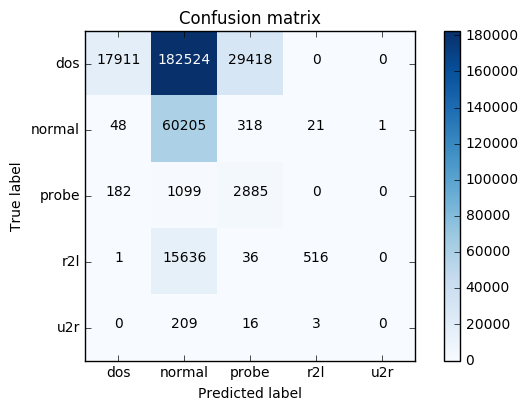

In [160]:
# 读取测试数据

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
data_test_1= pd.read_csv("E:\Pycharm\Intrusion_Detection\corrected.csv",  header=None,names = col_names)
# data.head()
# #one-hot
# dummies_protocol = pd.get_dummies(data_test_1["protocol_type"], prefix='protocol')
# data_test_2 = pd.concat([data_test_1, dummies_protocol], axis=1)
#去重
# data_test_2=data.drop_duplicates()
#建立X,y
feature=["duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files",
    "is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]
X_test_1=data_test_1[feature]
y_test_1=data_test_1['label'].copy()   #一维
##y的处理
u2r=["buffer_overflow.","loadmodule.","perl.","rootkit.","httptunnel.","ps.","sqlattack.","xterm."]
r2l=["ftp_write.","imap.","guess_passwd.","phf.","spy.","multihop.","warezmaster.","warezclient.","named.","sendmail."
    ,"snmpgetattack.","snmpguess.","worm.","xlock.","xsnoop."]
dos=["back.","land.","pod.","neptune.","smurf.","teardrop.","apache2.","mailbomb.","processtable.","udpstorm."]
probe=["satan.","portsweep.","ipsweep.","nmap.","mscan.","saint."]
for i in u2r:
    y_test_1[y_test_1==i]="u2r"
for i in r2l:
    y_test_1[y_test_1==i]="r2l"
for i in dos:
    y_test_1[y_test_1==i]="dos"
for i in probe:
    y_test_1[y_test_1==i]="probe"
y_test_1[y_test_1=="normal."]="normal"
# #标准化
X_test=scaler.fit_transform(X_test_1,scaler)  #X是ndarray
#验证测试集
pred_test=clf_1.predict(X_test)
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#混淆矩阵
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test_1,pred_test)
class_names=['dos','normal','probe','r2l','u2r']
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

In [161]:
#分类报告
from sklearn.metrics import classification_report
class_names=['dos','normal','probe','r2l','u2r']
print(classification_report(y_test_1,pred_test,target_names=class_names,digits=6))

             precision    recall  f1-score   support

        dos   0.987267  0.077924  0.144446    229853
     normal   0.231849  0.993597  0.375969     60593
      probe   0.088299  0.692511  0.156627      4166
        r2l   0.955556  0.031873  0.061689     16189
        u2r   0.000000  0.000000  0.000000       228

avg / total   0.825685  0.262088  0.185300    311029

